Tester notebook to ensure that `make_canvas` applies inverse views correctly and that `extract_latents` applies the forward view transform correctly.

I run these two functions sequentially 100 times and get the expected output from correctly applying/averaging the views so I think we can say these are verified.

In [7]:
from mcmc_visanagrams.views import VIEW_MAP
from mcmc_visanagrams.utils.output import make_canvas
from mcmc_visanagrams.utils.latents import extract_latents
from mcmc_visanagrams.utils.display import image_from_latents

from mcmc_visanagrams.context import ContextList, Context

import matplotlib.pyplot as plt
import torch
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Make a dummy context

guidance_mag = 20

context = ContextList()
context.append(Context((1, 0, 0), "a drawing of a penguin", guidance_mag, "identity"))
context.append(Context((1, 0, 0), "a drawing of a giraffe", guidance_mag, "rotate_180"))

0.0
255.0
0.0
255.0
0.0
255.0


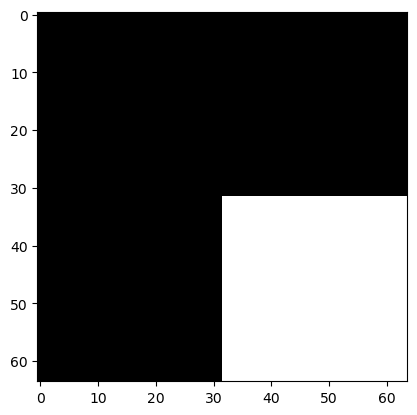

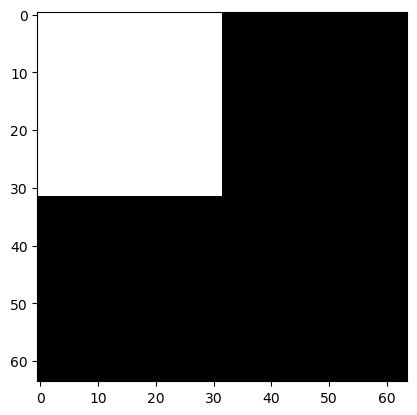

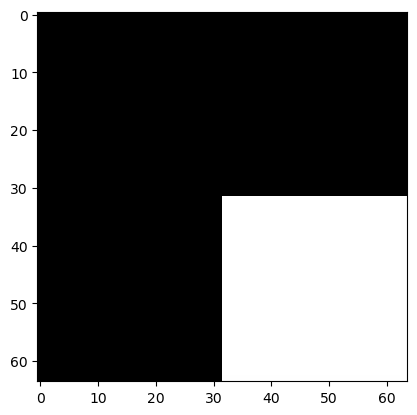

In [14]:
latents = torch.ones((2, 3, 64, 64)) * -1.0
# latents[0, 0, 32:, 32:] = 1.0
# latents[0, 1, 32:, :32] = 1.0
latents[0, :, 32:, 32:] = 1.0

# Since this latent has had the rotation view applied to it already, we should see the output
# with 3 black quadrants and the fourth quadrant pure white
latents[1, :, :32, :32] = 1.0

sizes = context.collapse_sizes()
views = context.collapse_views()

for i, sub_lat in enumerate(latents):
    img = image_from_latents(sub_lat.unsqueeze(0), clip_dynamic_range=True)
    plt.figure()
    plt.imshow(img)

canvas = make_canvas(latents, 64, sizes, views=views)

plt.figure()
plt.imshow(image_from_latents(canvas, clip_dynamic_range=True))

In [15]:
# sizes = []
# views = []
# for size, ctx in context.items():
#     if isinstance(ctx, list):
#         # Means we have multiple views for the same sub-image.
#         # NOTE: Hand-waving the extraction of the sub-image here.
#         # NOTE: Expected format is channel in zeroth dimension
#         for d in ctx:
#             view_str = d["view"]
#             view = VIEW_MAP[view_str]()
#             sizes.append(size)
#             views.append(view)
sizes = context.collapse_sizes()
views = context.collapse_views()

latents = extract_latents(canvas, sizes, views=views)

Step 0 canvas min: -1.0, max: 1.0
Step 1 canvas min: -1.0, max: 1.0
Step 2 canvas min: -1.0, max: 1.0
Step 3 canvas min: -1.0, max: 1.0
Step 4 canvas min: -1.0, max: 1.0
Step 5 canvas min: -1.0, max: 1.0
Step 6 canvas min: -1.0, max: 1.0
Step 7 canvas min: -1.0, max: 1.0
Step 8 canvas min: -1.0, max: 1.0
Step 9 canvas min: -1.0, max: 1.0
Step 10 canvas min: -1.0, max: 1.0
Step 11 canvas min: -1.0, max: 1.0
Step 12 canvas min: -1.0, max: 1.0
Step 13 canvas min: -1.0, max: 1.0
Step 14 canvas min: -1.0, max: 1.0
Step 15 canvas min: -1.0, max: 1.0
Step 16 canvas min: -1.0, max: 1.0
Step 17 canvas min: -1.0, max: 1.0
Step 18 canvas min: -1.0, max: 1.0
Step 19 canvas min: -1.0, max: 1.0
Step 20 canvas min: -1.0, max: 1.0
Step 21 canvas min: -1.0, max: 1.0
Step 22 canvas min: -1.0, max: 1.0
Step 23 canvas min: -1.0, max: 1.0
Step 24 canvas min: -1.0, max: 1.0
Step 25 canvas min: -1.0, max: 1.0
Step 26 canvas min: -1.0, max: 1.0
Step 27 canvas min: -1.0, max: 1.0
Step 28 canvas min: -1.0, max:

Text(0.5, 1.0, 'Step 99')

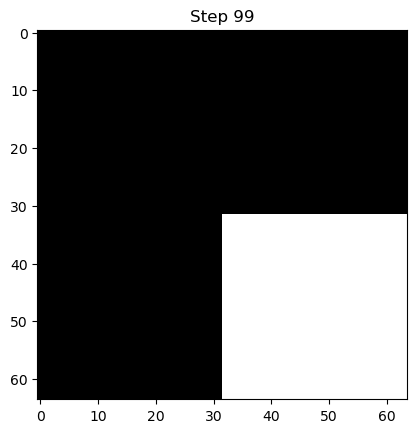

In [16]:
# Repeatedly apply extraction and making of canvas
# canvas = latent
canvas_test = canvas.clone()
for i in range(100):
    print(f"Step {i} canvas min: {canvas_test.min()}, max: {canvas_test.max()}")
    lats = extract_latents(canvas_test, sizes, views=views)
    canvas_test = make_canvas(lats, 64, sizes, views=views)
img_test = image_from_latents(canvas_test, clip_dynamic_range=True)
plt.figure()
plt.imshow(img_test)
plt.title(f"Step {i}")

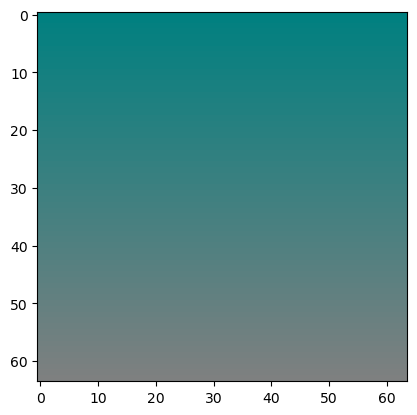

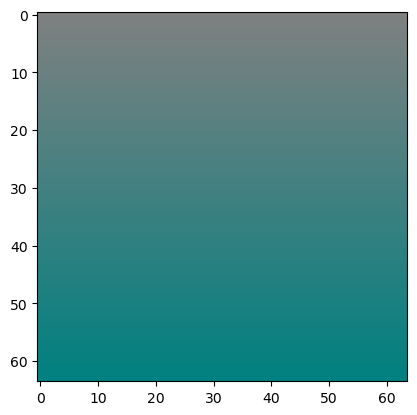

In [8]:
for lat in latents:
    plt.figure()
    plt.imshow(latent_to_img(lat))

In [9]:
canvas = make_canvas(latents, 128, sizes, views=views)

/home/dcolli23/miniconda3/envs/mcmc_visanagrams/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1704987277512/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
canvas_np = latent_to_img(canvas)

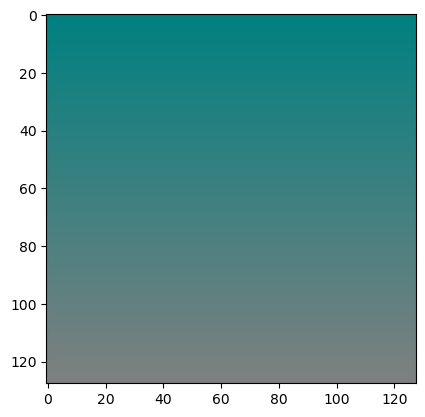

In [14]:
plt.figure()
plt.imshow(canvas_np)

In [12]:
canvas_np

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)